<a href="https://colab.research.google.com/github/promitdutta-biz/data_analyst_projects/blob/main/Hotel_Bookings_XGBoost_Classification_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path= "/content/drive/MyDrive/data_science_proj/hotel_bookings.csv"
df = pd.read_csv(path)

In [ ]:
data1 = {
  "arrival_date_month": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
  "arrival_date_month_num": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}
df_1 = pd.DataFrame(data1)
df = pd.merge(df, df_1, on='arrival_date_month')

In [ ]:
'''
selected_columns=['hotel', 'is_canceled', 'lead_time', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'total_of_special_requests']
df = df[selected_columns]
'''

"\nselected_columns=['hotel', 'is_canceled', 'lead_time', 'adults', 'children', 'meal',\n       'country', 'market_segment', 'distribution_channel', 'reserved_room_type',\n       'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'adr',\n       'total_of_special_requests']\ndf = df[selected_columns]\n"

not converting into int

In [ ]:
df['children'] = df['children'].astype('int', errors='ignore')
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
df['hotel'].value_counts(normalize=True)*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

In [ ]:
df['is_canceled'].value_counts(normalize=True)*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

In [ ]:
df['meal'].value_counts(normalize=True)*100

BB           77.318033
HB           12.114080
SC            8.920345
Undefined     0.979144
FB            0.668398
Name: meal, dtype: float64

In [ ]:
df['market_segment'].value_counts(normalize=True)*100

Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: market_segment, dtype: float64

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [ ]:
df['is_repeated_guest'].value_counts(normalize=True)*100

0    93.087558
1     6.912442
Name: is_repeated_guest, dtype: float64

In [ ]:
df['reserved_room_type'].value_counts(normalize=True)*100

A    77.419355
E    14.285714
D     6.912442
H     0.921659
C     0.460829
Name: reserved_room_type, dtype: float64

In [ ]:
df['booking_changes'].value_counts(normalize=True)*100

1    32.258065
0    30.875576
2    24.884793
3     4.608295
4     4.608295
5     2.304147
6     0.460829
Name: booking_changes, dtype: float64

In [ ]:
df['deposit_type'].value_counts(normalize=True)*100

No Deposit    98.156682
Refundable     1.382488
Non Refund     0.460829
Name: deposit_type, dtype: float64

In [ ]:
df['customer_type'].value_counts(normalize=True)*100

Transient-Party    67.741935
Transient          26.267281
Group               3.686636
Contract            2.304147
Name: customer_type, dtype: float64

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


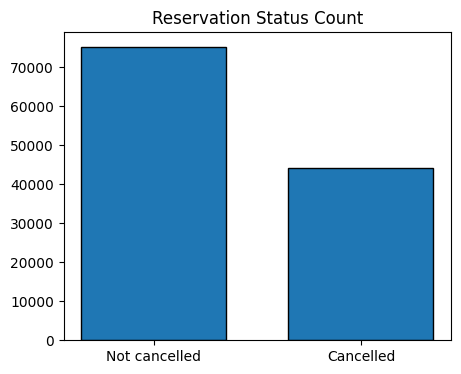

In [ ]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)*100
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not cancelled', 'Cancelled'],df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

Text(0.5, 1.0, 'reservation status in different hotels')

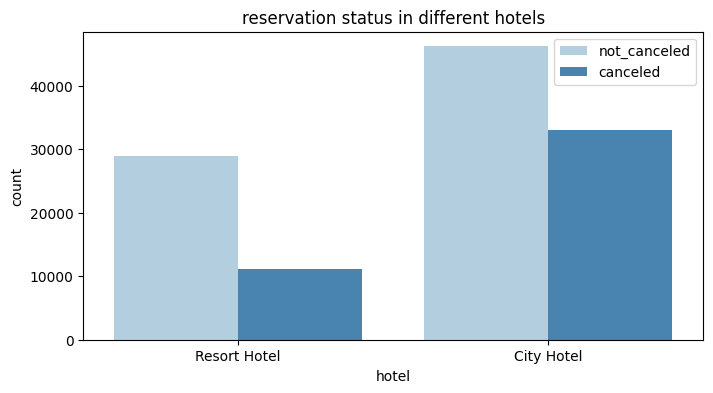

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df, palette='Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(['not_canceled','canceled'])
plt.title('reservation status in different hotels')

In [ ]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])
resort_hotel=df[df['hotel']=='Resort Hotel']
city_hotel=df[df['hotel']=='City Hotel']

resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

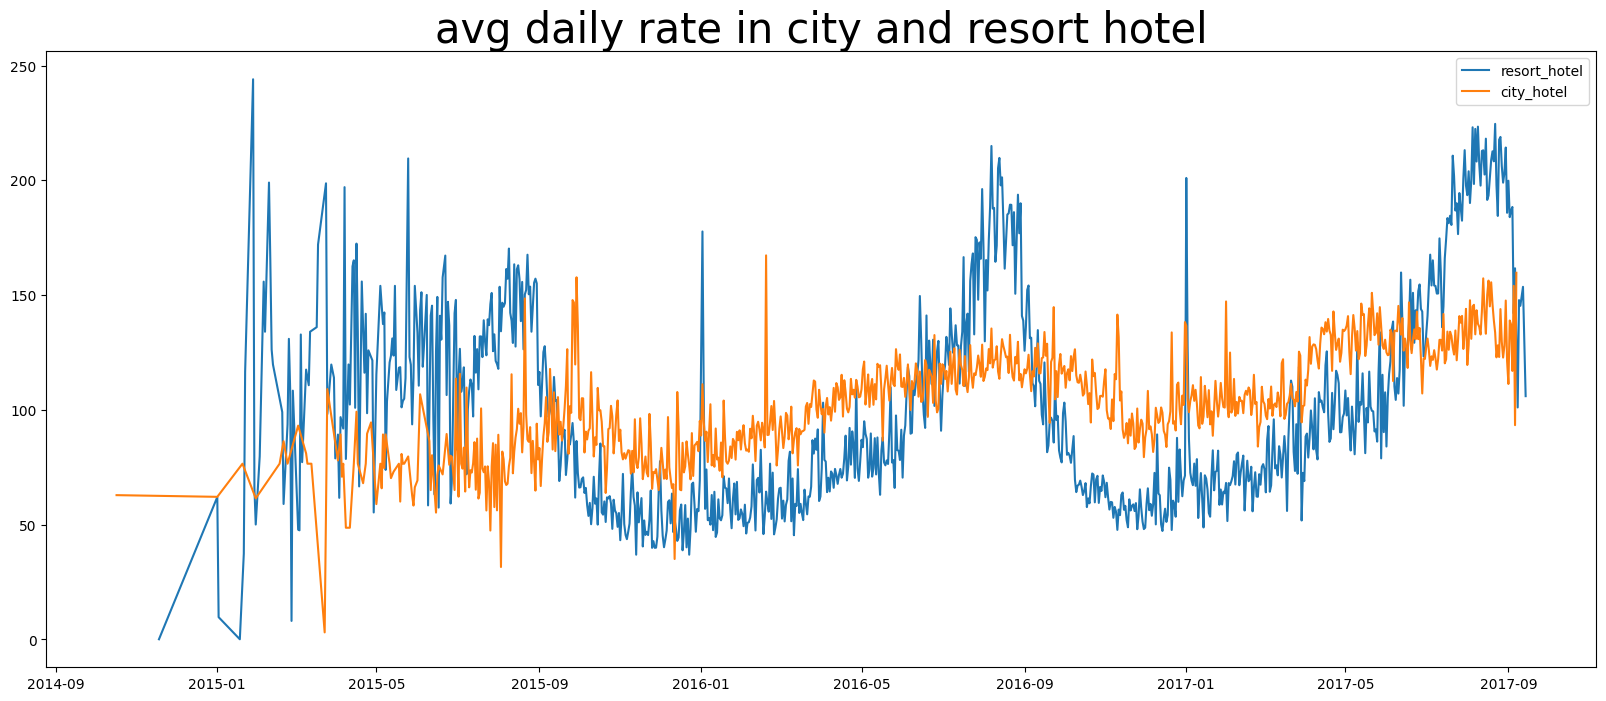

In [ ]:
plt.figure(figsize=(20,8))
plt.title('avg daily rate in city and resort hotel', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='resort_hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='city_hotel')
plt.legend()
plt.show()

In [ ]:
df['month']=df['reservation_status_date'].dt.month

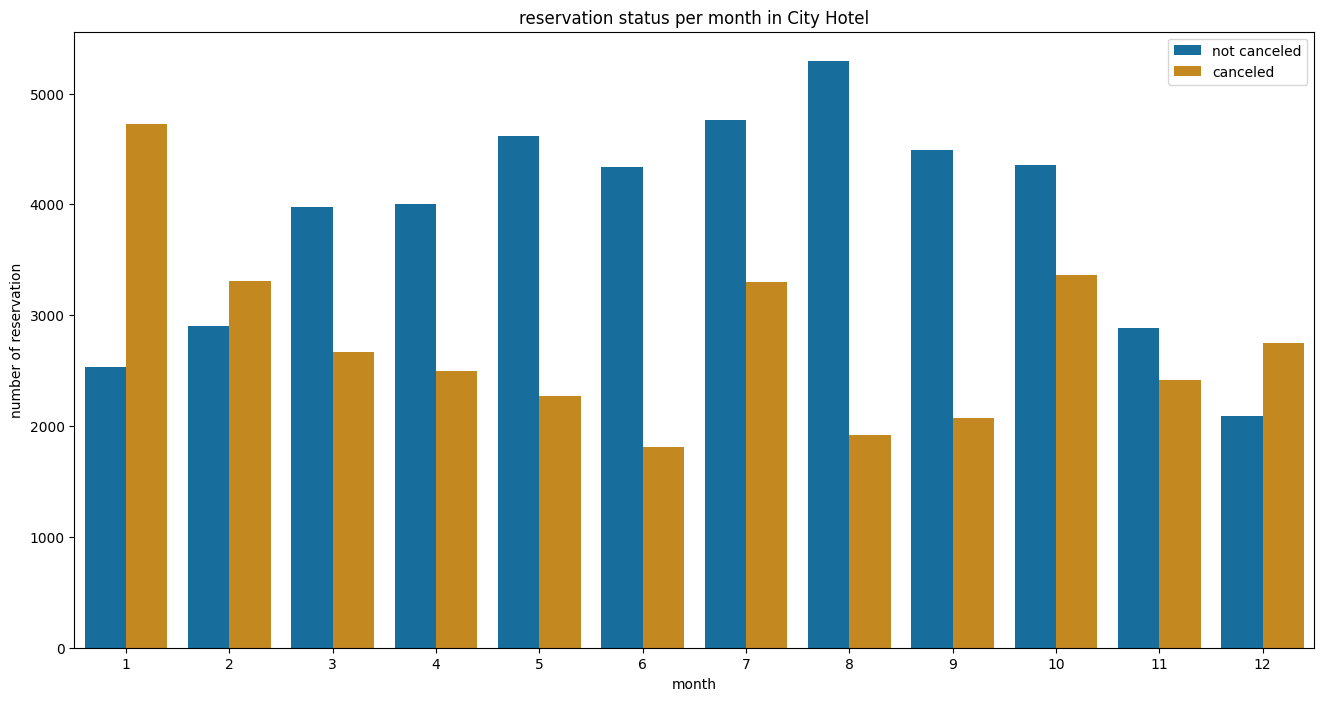

In [ ]:
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df[df['hotel']=='City Hotel'], palette= 'colorblind')
plt.title('reservation status per month in City Hotel')
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

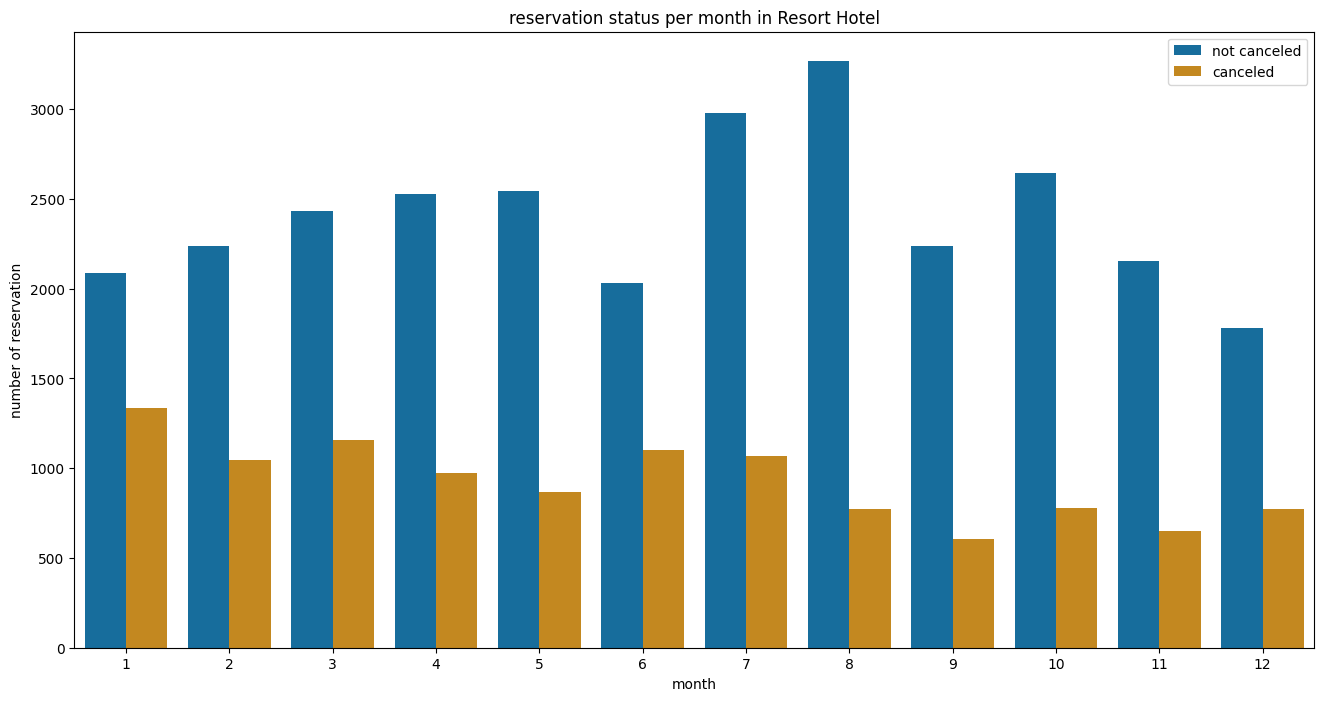

In [ ]:
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df[df['hotel']=='Resort Hotel'], palette= 'colorblind')
plt.title('reservation status per month in Resort Hotel')
plt.xlabel('month')
plt.ylabel('number of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

In [ ]:
data = df.groupby(['month','hotel','is_canceled'])[['adr']].sum().reset_index()
data

,month,hotel,is_canceled,adr
0,1,City Hotel,0,218650.94
1,1,City Hotel,1,465433.74
2,1,Resort Hotel,0,135238.86
3,1,Resort Hotel,1,105827.43
4,2,City Hotel,0,249094.91
5,2,City Hotel,1,355443.76
6,2,Resort Hotel,0,120494.48
7,2,Resort Hotel,1,97872.00
8,3,City Hotel,0,355124.57
9,3,City Hotel,1,303097.16


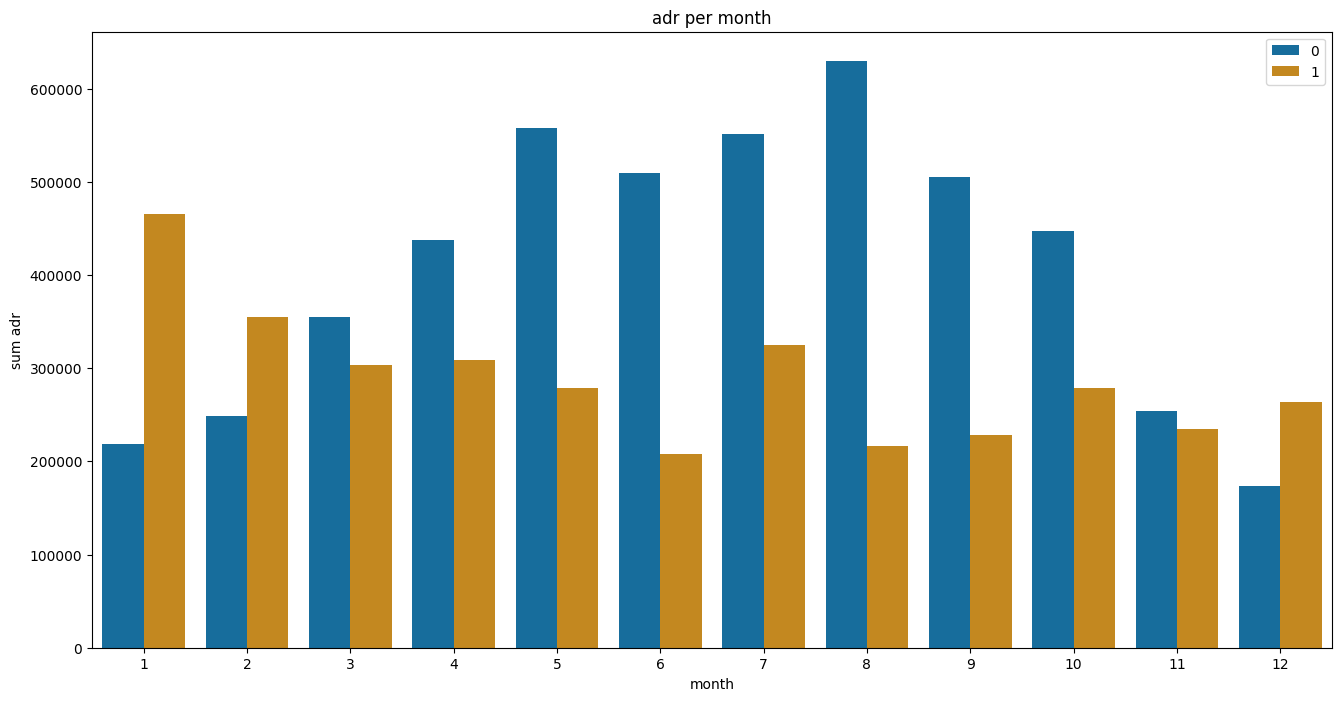

In [ ]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(x='month', y='adr', hue='is_canceled', data= data[data['hotel']=='City Hotel'], palette= 'colorblind')
plt.title('adr per month in City Hotel')
plt.xlabel('month')
plt.ylabel('sum adr')
plt.legend()
plt.show()

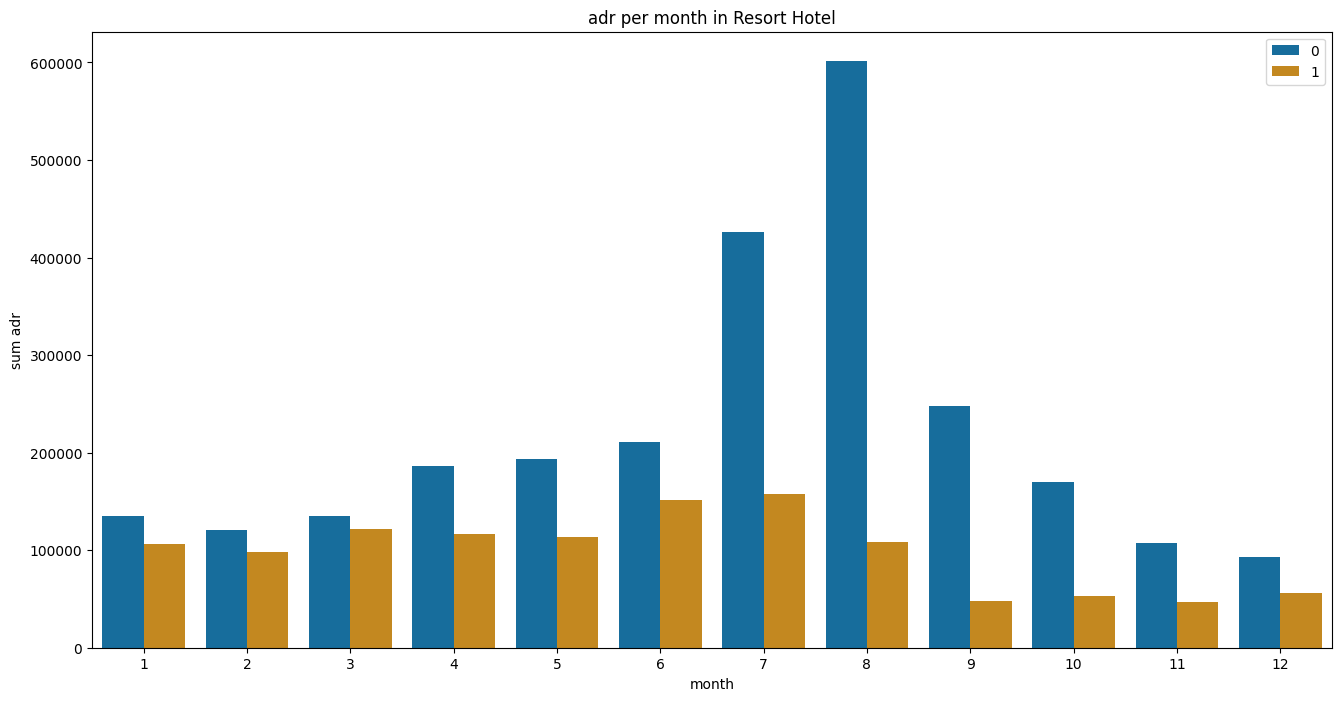

In [ ]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(x='month', y='adr', hue='is_canceled', data= data[data['hotel']=='Resort Hotel'], palette= 'colorblind')
plt.title('adr per month in Resort Hotel')
plt.xlabel('month')
plt.ylabel('sum adr')
plt.legend()
plt.show()

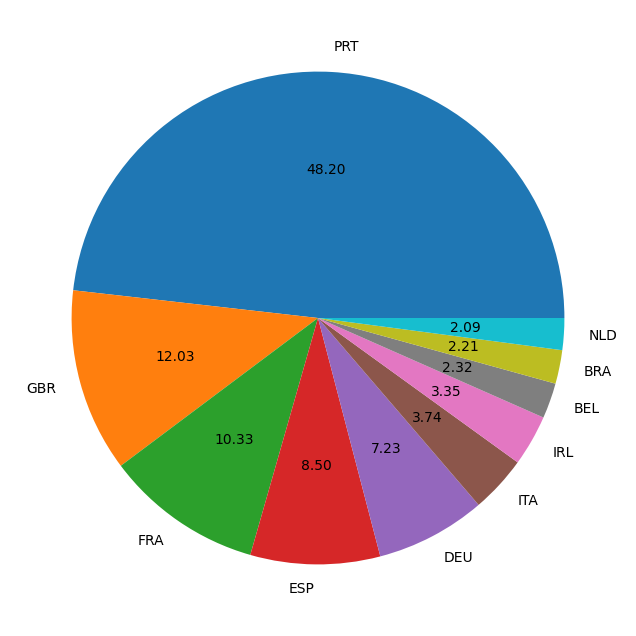

In [ ]:
top_10_country=df['country'].value_counts()[0:10]
plt.figure(figsize=(8,8))
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

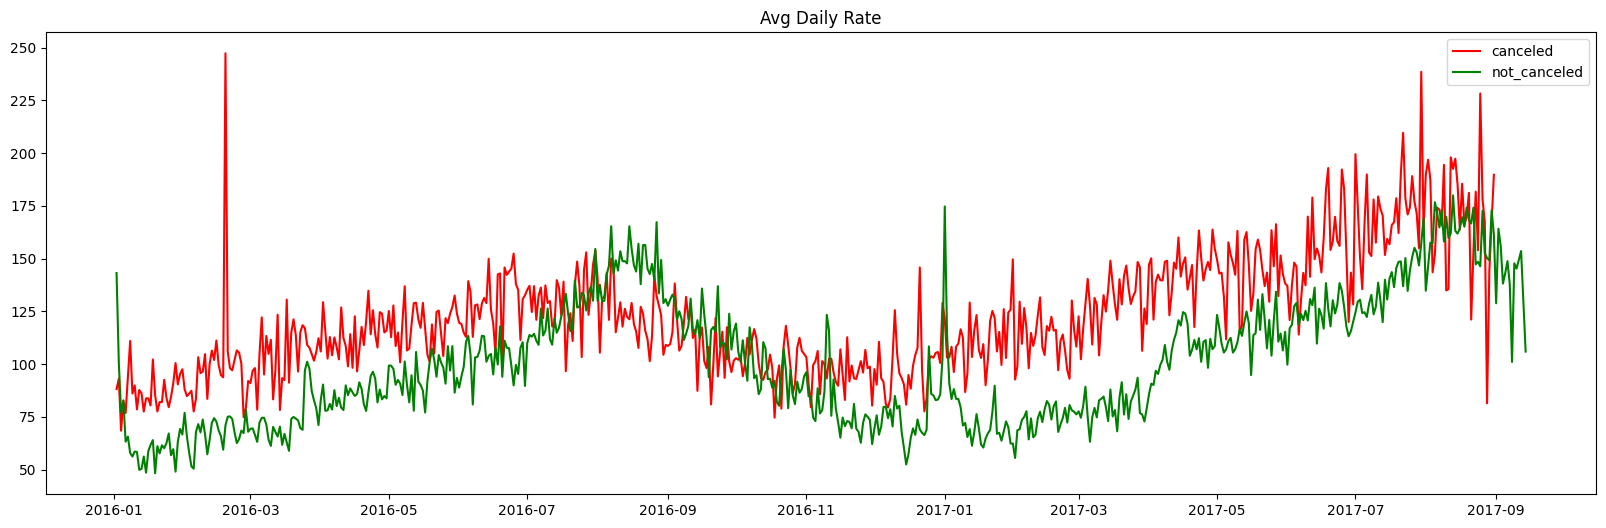

In [ ]:
not_canceled_data= df[df['is_canceled']==0]
canceled_data=df[df['is_canceled']==1]

canceled_df_adr= canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_df_adr= not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

canceled_df_adr=canceled_df_adr[(canceled_df_adr['reservation_status_date'])>'2016']
not_canceled_df_adr=not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date'])>'2016']

plt.figure(figsize=(20,6))
plt.title('Avg Daily Rate')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='canceled', color='red')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='not_canceled', color='green')

plt.legend()
plt.show()

In [ ]:
X = df.drop(['is_canceled'],axis=1).copy()
y = df['is_canceled'].copy()

In [ ]:
X.shape, y.shape

((118898, 15), (118898,))

In [ ]:
OHE_X=pd.get_dummies(X, columns= X.columns[X.dtypes=='object'].to_list(),drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(OHE_X, y, random_state=42, stratify=y, test_size=0.2)

In [ ]:
import xgboost as xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
clf=xgboost.XGBClassifier()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5] ,
 "max_depth"        : [ 3, 4, 5, 6,7, 8,9, 10],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "booster"          : ['gbtree', 'dart'],
 "eval_metric"      : ['rmse', 'rmsle', 'logloss', 'auc', 'aucpr']
}

In [ ]:
random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,
                                 n_jobs=-1,cv=5,verbose=3,
                                 return_train_score=True,
                                 error_score='raise')

In [ ]:
random_search.fit(OHE_X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eval_metric': ['rmse', 'rmsle',
                                                        'logloss', 'auc',
                                                        'aucpr'],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   return_train_score=True, verbose=3)

In [ ]:
pd.DataFrame(random_search.cv_results_).to_csv('param.csv')

'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.35, 'gamma': 0.2, 'eval_metric': 'rmse', 'colsample_bytree': 0.7, 'booster': 'gbtree'

In [ ]:
clf=xgboost.XGBClassifier(objective= 'binary:logistic',
                                 missing = np.nan,
                                 n_estimators=100,
                                 min_child_weight=3,
                                 max_depth= 3,
                                 learning_rate= 0.35,
                                 gamma= 0.2,
                                 eval_metric= 'rmse',
                                 colsample_bytree= 0.7,
                                 booster='gbtree')

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf , OHE_X, y, cv=10, error_score='raise')
score.mean()

0.8286851929549341

In [ ]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

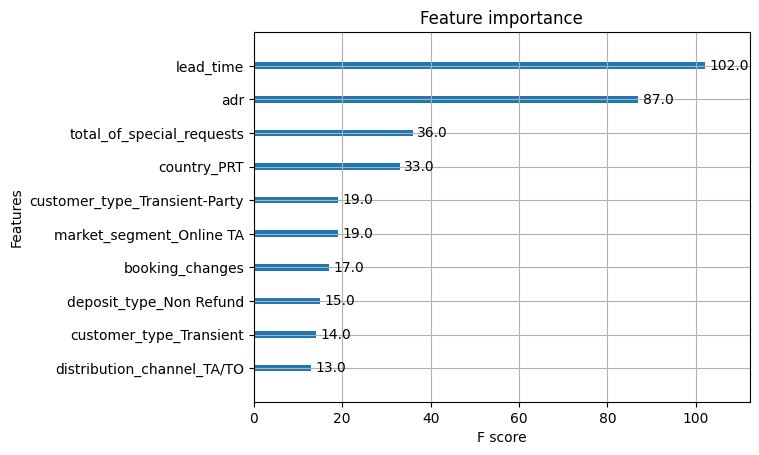

In [ ]:
%matplotlib inline
from xgboost import XGBClassifier, plot_importance
fit = XGBClassifier(objective= 'binary:logistic', missing = np.nan,
                    n_estimators=100, min_child_weight=3, max_depth= 3,
                    learning_rate= 0.35, gamma= 0.2, eval_metric= 'rmse',
                    colsample_bytree= 0.7, booster='gbtree').fit(OHE_X, y)
plot_importance(fit, max_num_features=10) #f_imp parameter
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap

model=XGBClassifier(objective= 'binary:logistic',
                                 missing = np.nan,
                                 n_estimators=100,
                                 min_child_weight=3,
                                 max_depth= 3,
                                 learning_rate= 0.35,
                                 gamma= 0.2,
                                 eval_metric= 'rmse',
                                 colsample_bytree= 0.7,
                                 booster='gbtree')

model.fit(X_train, y_train)

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 23781it [56:33,  7.00it/s]


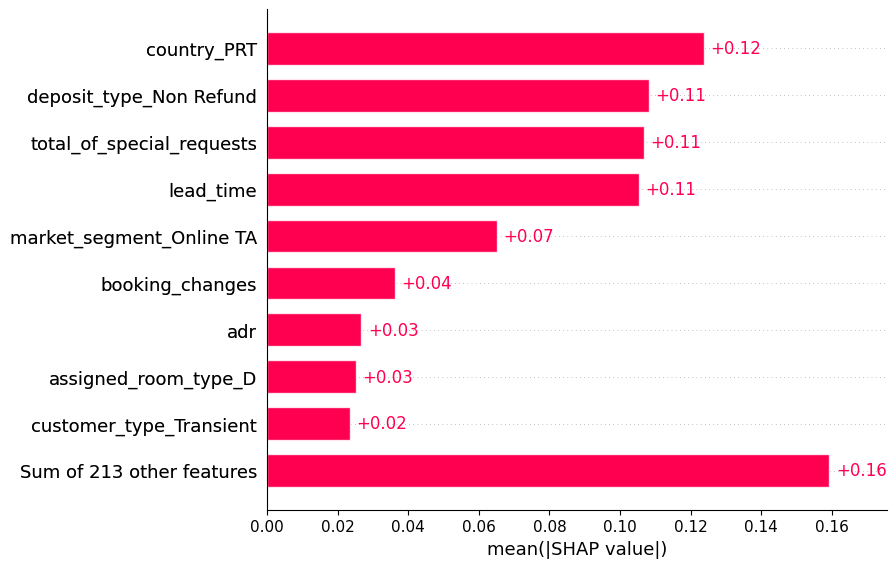

In [ ]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


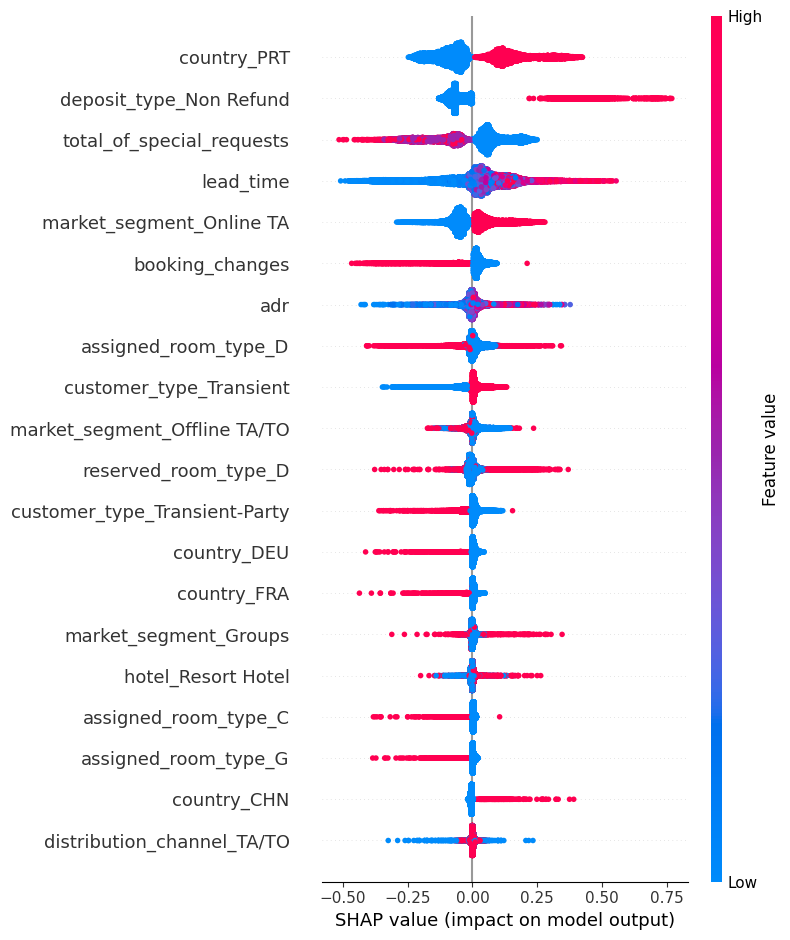

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.35, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

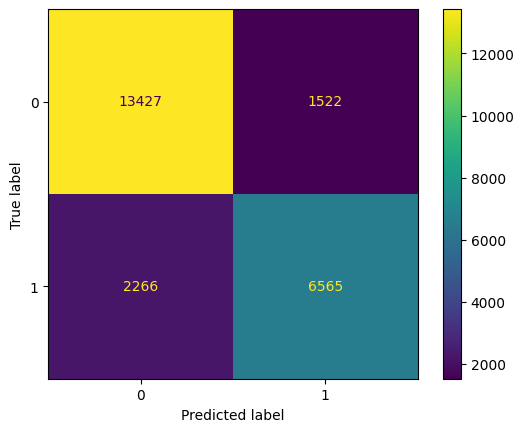

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

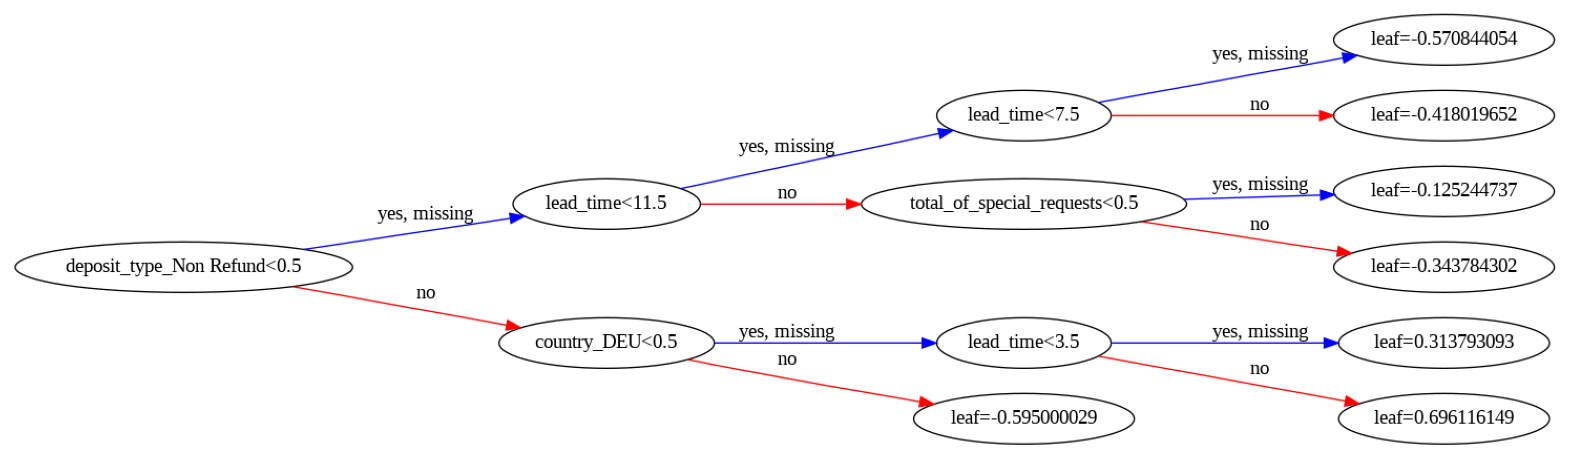

In [ ]:
from xgboost import plot_tree
plot_tree(clf, rankdir='LR')
#plt.rcParams['figure.figsize']=[50, 30]
plt.gcf().set_size_inches(20, 10)
plt.savefig("HotelBooking_xgb.png")

In [ ]:
from sklearn.metrics import classification_report # for model evaluation metrics
from xgboost import XGBClassifier # for extreme gradient boosting model

In [ ]:
def model_training(X, y, n_trees, mdepth, gamma, lam):

    ##### Step 1 - Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    ##### Step 2 - Set model and its parameters
    model = XGBClassifier(
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=n_trees, # number of trees, default = 100
                      eta=0.35, # this is learning rate, default = 0.3
                      max_depth=mdepth, # maximum depth of the tree, default = 6
                      gamma = gamma, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = lam, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )

    # Fit the model
    clf = model.fit(X_train, y_train)


    ##### Step 3
    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)


    ##### Step 4 - Model summary
    # Basic info about the model
    print('*************** Tree Summary ***************')
    print('No. of classes: ', clf.n_classes_)
    print('Classes: ', clf.classes_)
    print('No. of features: ', clf.n_features_in_)
    print('No. of Estimators: ', clf.n_estimators)
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    return clf, X_test, y_test


##### Step 5 - Select data for modelling and call the function to train the model
X=OHE_X
y=y

# Train the model
clf, X_test, y_test = model_training(X, y, n_trees=500, mdepth=3, gamma=0.2, lam=1)

*************** Tree Summary ***************
No. of classes:  2
Classes:  [0 1]
No. of features:  222
No. of Estimators:  500
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.852228763666947
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15028
           1       0.83      0.76      0.79      8752

    accuracy                           0.85     23780
   macro avg       0.85      0.83      0.84     23780
weighted avg       0.85      0.85      0.85     23780

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8617401543346159
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     59717
           1       0.84      0.77      0.81     35401

    accuracy                           0.86     95118
   macro avg       0.86   

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(OHE_X, y, test_size=0.2, random_state=0)

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.927


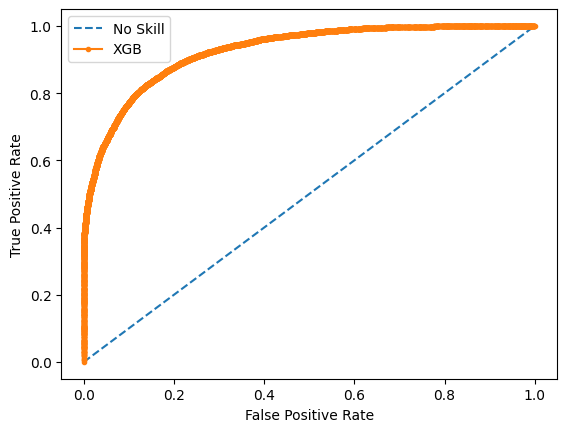

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
clf_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
clf_probs = clf_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
clf_auc = roc_auc_score(y_test, clf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (clf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(clf_fpr, clf_tpr, marker='.', label='XGB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

XGB: f1=0.791 auc=0.897


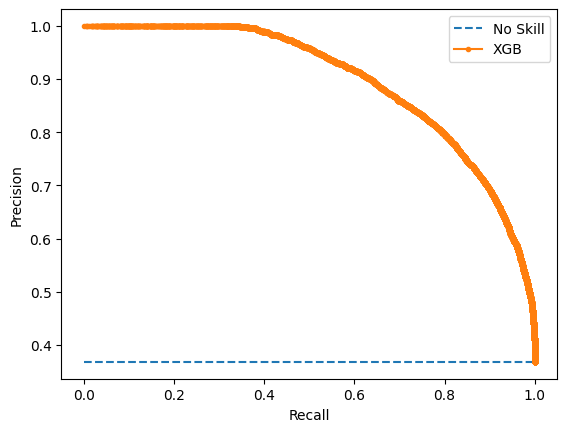

In [ ]:
# predict probabilities
clf_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
clf_probs = clf_probs[:, 1]
# predict class values
yhat = clf.predict(X_test)
clf_precision, clf_recall, _ = precision_recall_curve(y_test, clf_probs) # thrershold change
clf_f1, clf_auc = f1_score(y_test, yhat), auc(clf_recall, clf_precision)
# summarize scores
print('XGB: f1=%.3f auc=%.3f' % (clf_f1, clf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(clf_recall, clf_precision, marker='.', label='XGB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()